# Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Load Cleared Data

In [22]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df_all = pd.concat([benin, sierra_leone, togo])

# Boxplot Comparison


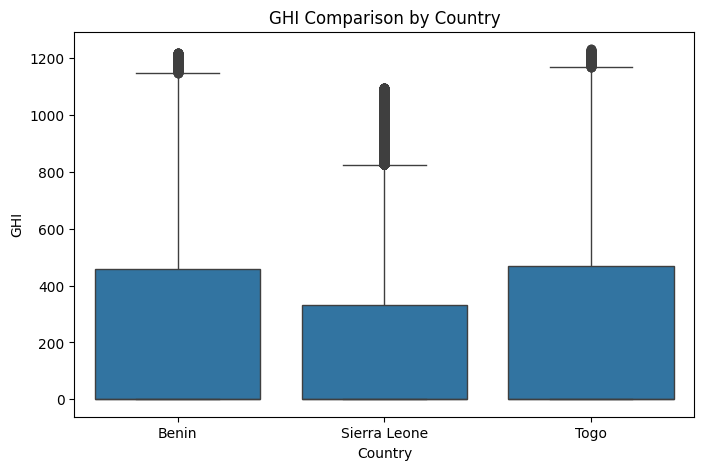

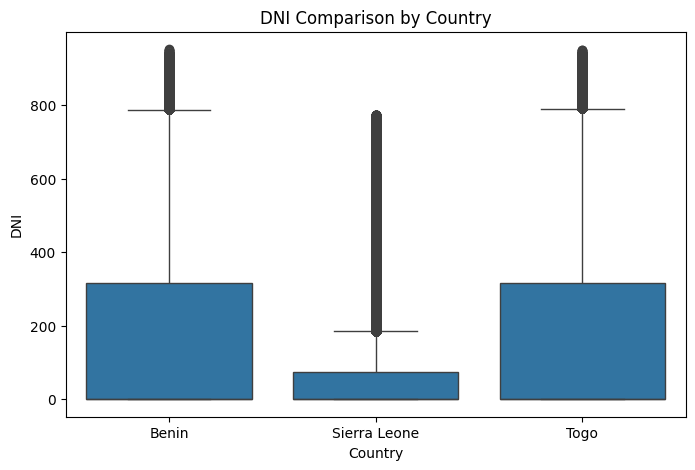

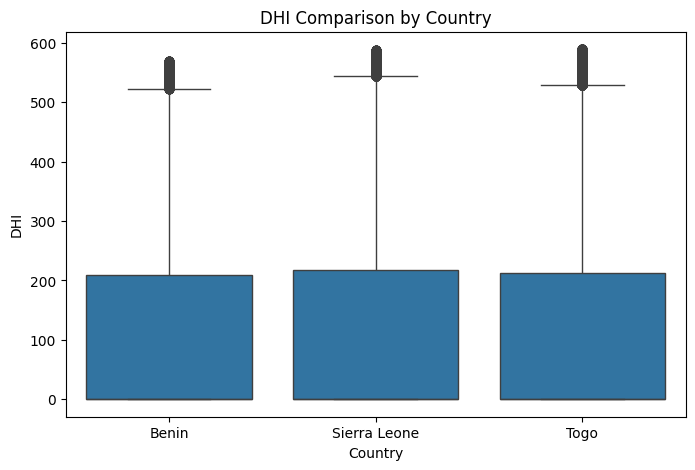

In [23]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Comparison by Country')
    plt.show()

# Summary Table

In [9]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         234.93    0.2  325.71  166.53    0.0  261.91  111.28    0.0   
Sierra Leone  187.21    0.0  277.02  104.21    0.0  200.82  110.50    0.0   
Togo          237.48    0.6  327.17  167.14    0.0  261.94  113.17    0.4   

                      
                 std  
Country               
Benin         149.25  
Sierra Leone  151.44  
Togo          151.66

# One-Way ANOVA Test

In [12]:
from scipy.stats import f_oneway

# If p_val < 0.05, the differences are statistically significant.

f_stat, p_val = f_oneway(benin['GHI'], sierra_leone['GHI'], togo['GHI'])
print("ANOVA p-value for GHI:", p_val)


ANOVA p-value for GHI: 0.0


### 🔍 Key Observations

- Benin has the highest **median GHI** with relatively low variability.
- Sierra Leone shows the **most variability** in DNI values.
- Togo has the **lowest average DHI** among the three.


# Visual Summary

<Axes: title={'center': 'Average GHI by Country'}, xlabel='Country'>

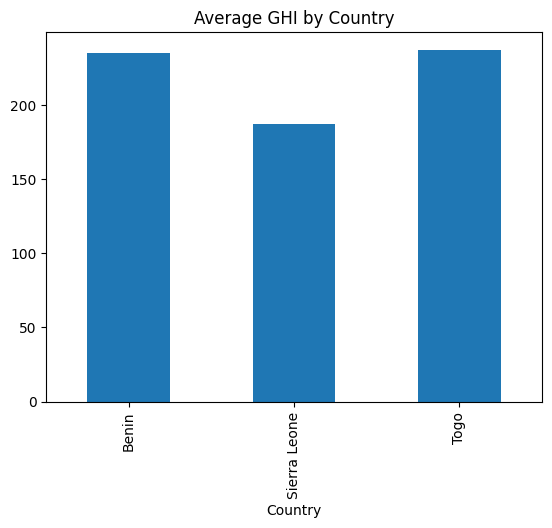

In [14]:
df_all.groupby('Country')['GHI'].mean().plot(kind='bar', title='Average GHI by Country')